In [1]:
# Rally Work
## The Goal is simple today:
### To find a way to evaluate the _Total Direction_ of _All Shots_ by player played from the baseline (Ignoring Serves)

In [ ]:
# Now remember, we have the following from the Brief:

# Rally information:
    # Rally Length [Sort of Done]
        # On Serve:
            # Unforced Errors:
                # By Stroke
                    # By First and Second Serve
            # Winners or Forced Errors:
                # By Stroke
                    # By First and Second Serve
        # On return
            # AVG Rally length on Return (First and Second Serve)
            # % of Points won at following Rally Lengths:
                # 0-4
                # 5-8
                # 9+
            # Unforced Errors:
                # By Stroke
                    # By First and Second Serve
            # Winners or Forced Errors:
                # By Stroke
                    # By First and Second Serve
    # Miscellaneous Rally Information:
        # As Server:
            # % of Rallies approached net
                # On First Serve
                # On Second Serve
            # Drop Shot Frequency (% of Points where a Drop Shot was Played)
                # Drop Shot Win %
        # As Returner:
            # % of Rallies approached net
                # On First Serve
                # On Second Serve            
            # Drop Shot Frequency (% of Points where a Drop Shot was Played)
                # Drop Shot Win %

In [2]:
# Import whatever we need:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
ds = pd.read_csv("DjoWawProcessed.csv")

In [16]:
ds.head()

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,PtsAfter,GmW,Gm1.1,Gm2.1,SetW,Set1.1,Set2.1,RevTB,TBrev,rallyCount
0,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,1,0,0,0,0,0-0,1,1,0,...,15-0,0,0,0,0,0,0,NaN,NaN,3
1,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,2,0,0,0,0,15-0,1,1,0,...,15-15,0,0,0,0,0,0,NaN,NaN,6
2,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,3,0,0,0,0,15-15,1,1,0,...,15-30,0,0,0,0,0,0,NaN,NaN,6
3,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,4,0,0,0,0,15-30,1,1,0,...,30-30,0,0,0,0,0,0,NaN,NaN,7
4,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,5,0,0,0,0,30-30,1,1,0,...,40-30,0,0,0,0,0,0,NaN,NaN,1


In [17]:
# Ok, let's segment by player:

## Depending on which players are in your Dataset, you're going to need to change the initials 
## for "ND" or for "SW".
P1_S = ds[(ds["Serving"]=="ND")] # P1 represents Djokovic
P2_S = ds[(ds["Serving"]=="SW")] # P2 represents Wawrinka

In [10]:
P1_S.head()

,match_id,Pt,Set1,Set2,Gm1,Gm2,Pts,Gm#,TbSet,TB?,...,PtsAfter,GmW,Gm1.1,Gm2.1,SetW,Set1.1,Set2.1,RevTB,TBrev,rallyCount
0,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,1,0,0,0,0,0-0,1,1,0,...,15-0,0,0,0,0,0,0,NaN,NaN,3
1,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,2,0,0,0,0,15-0,1,1,0,...,15-15,0,0,0,0,0,0,NaN,NaN,6
2,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,3,0,0,0,0,15-15,1,1,0,...,15-30,0,0,0,0,0,0,NaN,NaN,6
3,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,4,0,0,0,0,15-30,1,1,0,...,30-30,0,0,0,0,0,0,NaN,NaN,7
4,20160911-M-US_Open-F-Novak_Djokovic-Stanislas_...,5,0,0,0,0,30-30,1,1,0,...,40-30,0,0,0,0,0,0,NaN,NaN,1


In [31]:
# Yo, remember, we have a "Rally" Column. Seriously this is useful AF
P1_S["Rally"].head()

0                f27 b2 b2d@
1       s28 f1 f1 f2 b3 b2n#
2       f28 f2 b3 b3 b3 b1w@
3    f18 f1 f1 f3 s3 b1 f1n@
4                       s2d#
Name: Rally, dtype: object

In [77]:

# Step One, Get table of Strings
test = P1_S["Rally"].head()
print(test)

0                f27 b2 b2d@
1       s28 f1 f1 f2 b3 b2n#
2       f28 f2 b3 b3 b3 b1w@
3    f18 f1 f1 f3 s3 b1 f1n@
4                       s2d#
Name: Rally, dtype: object


In [78]:
# Step Two, split string (we're using index[3] here because we can)
test[3].split()

['f18', 'f1', 'f1', 'f3', 's3', 'b1', 'f1n@']

In [79]:
# Step Three, get every 2nd value (so, value[0,2,4])
z = test[3].split()
print(z[::2])

y = z[::2]

['f18', 'f1', 's3', 'f1n@']


In [80]:
# Step Four, now that we have all the values for one person, Join it back together
# as one big string with no whitespace
zz = "".join(y)
print(zz)


f18f1s3f1n@


In [81]:
# Step Five, count the occurances of "xx" within the whitespace
zz.count('f1')

3

In [150]:
### Counting Directions through a list (only for Returning Player):

# This is only for one side (Duece Side in this Example)

i = 0
c1 = 0
c2 = 0
c3 = 0

while i < len(test):
    z = test[i].split()
    y = z[::2]
    zz = "".join(y)
    c1 = c1 + zz.count('1')
    c2 = c2 + zz.count('2')
    c3 = c3 + zz.count('3')
    i = i + 1
    

In [152]:
print(c1)

4


In [239]:

## Here are the Rally Direction Numbers for Player 2

############################
##### Whilst Returning #####

P2r = P1_S[(P1_S['Rally'].notna())]


i = 0 # This is our iterable Loop Counter
c1 = 0 # Count of Balls hit in Direction "1" (Towards FOrehand)
c2 = 0  # Count of shots hit in Direction "2" (Through middle of court)
c3 = 0 # Count of shots hit in Directoin "3" (Towards Backhand)


for index, row in P2r.iterrows():
    z = row['Rally'].split() # This takes only the rows from the Rally Column
    y = z[::2] # Rally column starts at the return, so this takes every second shot (including return)
    zz = "".join(y) # We're now turning every second shot into a string without spaces
    c1 = c1 + zz.count('1') # And counting the number of times "1" occurs
    c2 = c2 + zz.count('2') # And counting the number of times "2" occurs
    c3 = c3 + zz.count('3') # And counting the number of times "3" occurs
    i = i + 1

print("Player Name is: ", P2_S['Serving'].mode()[0]) # Standard Player Name Check    
print("---------------------")
print("After [Returning Iteration], Shots aimed Duece Court: ", c1)
print("After [Returning Iteration], Shots aimed Middle Court: ", c2)
print("After [Returning Iteration], Shots aimed Advant Court: ", c3)


##########################
##### Whilst Serving #####


P2rs = P2_S[(P2_S['Rally'].notna())] # Since we're doing this for the serving player (see below)

i = 0 # This is our iterable Loop Counter

for index, row in P2rs.iterrows():
    z1 = row['Rally'].split()
    z = z1[1:] # Because we're doing servernow , we need to drop the first non-serve rally ball
    y = z[::2] # and now the code is the exact same as above
    zz = "".join(y)
    c1 = c1 + zz.count('1')
    c2 = c2 + zz.count('2')
    c3 = c3 + zz.count('3')
    i = i + 1

    
print("---------------------")    
print("After including [Serving Iteration], Total Shots aimed Duece Court: ", c1)
print("After including [Serving Iteration], Total Shots aimed Middle Court: ", c2)
print("After including [Serving Iteration], Total Shots aimed Advant Court: ", c3)

print("---------------------")

print((c1/(c1+c2+c3)), "%", " balls hit towards the Duece court")
print((c2/(c2+c1+c3)), "%", " balls hit towards the middle court")
print((c3/(c3+c2+c1)), "%", " balls hit towards the Advant court")



Player Name is:  SW
---------------------
After [Returning Iteration], Shots aimed Duece Court:  540
After [Returning Iteration], Shots aimed Middle Court:  814
After [Returning Iteration], Shots aimed Advant Court:  816
---------------------
After including [Serving Iteration], Total Shots aimed Duece Court:  1315
After including [Serving Iteration], Total Shots aimed Middle Court:  1481
After including [Serving Iteration], Total Shots aimed Advant Court:  1701
---------------------
0.29241716700022236 %  balls hit towards the Duece court
0.3293306648877029 %  balls hit towards the middle court
0.37825216811207474 %  balls hit towards the Advant court


In [ ]:
#### SO far, have only done this for player two (wawrinka - So I need to do it for player one too)

In [235]:
# PLayer One DIrectional Rally Statistics

############################
##### Whilst Returning #####

P1r = P2_S[(P2_S['Rally'].notna())] # remember we're using the first ball of the rally as our starting point, therefore we have to take the opposite player's serving Dataframe


i = 0 # This is our iterable Loop Counter
c1 = 0 # Count of Balls hit in Direction "1" (Towards FOrehand)
c2 = 0  # Count of shots hit in Direction "2" (Through middle of court)
c3 = 0 # Count of shots hit in Directoin "3" (Towards Backhand)


for index, row in P1r.iterrows():
    z = row['Rally'].split() # This takes only the rows from the Rally Column
    y = z[::2] # Rally column starts at the return, so this takes every second shot (including return)
    zz = "".join(y) # We're now turning every second shot into a string without spaces
    c1 = c1 + zz.count('1') # And counting the number of times "1" occurs
    c2 = c2 + zz.count('2') # And counting the number of times "2" occurs
    c3 = c3 + zz.count('3') # And counting the number of times "3" occurs
    i = i + 1

    
print("Player Name is: ", P1_S['Serving'].mode()[0]) # Standard Player Name Check
print("---------------------")
print("After [Returning Iteration], Shots aimed Duece Court: ", c1)
print("After [Returning Iteration], Shots aimed Middle Court: ", c2)
print("After [Returning Iteration], Shots aimed Advant Court: ", c3)


##########################
##### Whilst Serving #####


P1rs = P1_S[(P1_S['Rally'].notna())] # Since we're doing this for the serving player (see below)

i = 0 # This is our iterable Loop Counter

for index, row in P1rs.iterrows():
    z1 = row['Rally'].split()
    z = z1[1:] # Because we're doing server now , we need to drop the first non-serve rally ball
    y = z[::2] # and now the code is the exact same as above
    zz = "".join(y)
    c1 = c1 + zz.count('1')
    c2 = c2 + zz.count('2')
    c3 = c3 + zz.count('3')
    i = i + 1

    

print("---------------------")
print("After including [Serving Iteration], Total Shots aimed Duece Court: ", c1)
print("After including [Serving Iteration], Total Shots aimed Middle Court: ", c2)
print("After including [Serving Iteration], Total Shots aimed Advant Court: ", c3)

print("---------------------")

print((c1/(c1+c2+c3)), "%", " balls hit towards the Duece court")
print((c2/(c2+c1+c3)), "%", " balls hit towards the Middle court")
print((c3/(c3+c2+c1)), "%", " balls hit towards the Advant court")



Player Name is:  ND
---------------------
After [Returning Iteration], Shots aimed Duece Court:  620
After [Returning Iteration], Shots aimed Middle Court:  1056
After [Returning Iteration], Shots aimed Advant Court:  933
---------------------
After including [Serving Iteration], Total Shots aimed Duece Court:  1254
After including [Serving Iteration], Total Shots aimed Middle Court:  1449
After including [Serving Iteration], Total Shots aimed Advant Court:  1740
---------------------
0.2822417285617826 %  balls hit towards the Duece court
0.3261309925725861 %  balls hit towards the Middle court
0.3916272788656313 %  balls hit towards the Advant court


In [242]:
### Hey, this is pretty cool, but it really doesn't tell much of a story
### Like obviously, most of the play is going to go through the backhand court - it's modern tennis
### But, you know what is cool? Individual shot directions:

# Player 1 Shot Direction (In this Case it's Djok:)
## As an aside, I think it's important to ignore return of serve here - I think
## the serve is going to be too limiting in what it allows a returner to play,
## and thus probably doesn't reflect their baseline directional tendencies. If I had to guess
## (and don't worry I'll just check later), I'd imagine most returns are going to be through 
## the middle of the court (in order to neutralise server advantage)

# SO with that in mind: Let's start with P1 Serving and start with their first shot (ignoring return)


#####################################################
### Shot Direction Stats for Player One as Server ###
#####################################################

P1_sdr = P1_S[(P1_S['Rally'].notna())] # don't care about Null Rally Columns

# P1_sdr stands for Player One Shot Direction (just in case you were wondering)

# --------------------

i = 0 # This is our iterable Loop Counter
# We're going to have so many more of these now

cf1 = 0 # Count of forehands hit in Direction "1" (Towards FOrehand)
cf2 = 0 # Count of forehands hit in Direction "2" (Through middle of court)
cf3 = 0 # Count of forehands hit in Directoin "3" (Towards Backhand)
cr1 = 0 # Count of slice forehands hit in Direction 1
cr2 = 0 # Count of slice forehands hit in Direction 2
cr3 = 0 # Count of slice forehands hit in Direction 3

cb1 = 0 # Count of backhands hit in Direction "1" (Towards FOrehand)
cb2 = 0 # Count of backhands hit in Direction "2" (Through middle of court)
cb3 = 0 # Count of backhands hit in Directoin "3" (Towards Backhand)
cs1 = 0 # Count of slice backhands hit in Direction 1
cs2 = 0 # Count of slice backhands hit in Direction 2
cs3 = 0 # Count of slice backhands hit in Direction 3

# Two important things to note with the below code:
    # One; This isn't going to flag net cords, or balls that miss (some of the time)
    # simply due to the tokenisation of the data
    # Two; I'm not including shots that include an approach shot, I think it's
    # important to analyse that separately 


for index, row in P1_sdr.iterrows():
    z1 = row['Rally'].split()
    z = z1[1:] # remember, we're focusing on the serving player, and ignoring the return, hence [1] instead of [0]
    y = z[::2] # and now the code is the exact same as above
    zz = "".join(y) # This converts our string into a jumble of letters no spacing i.e f1s2s2f3
    cf1 = cf1 + zz.count('f1')
    cf2 = cf2 + zz.count('f2')
    cf3 = cf3 + zz.count('f3')
    cr1 = cr1 + zz.count('r1')
    cr2 = cr2 + zz.count('r2')
    cr3 = cr3 + zz.count('r3')
    
    cb1 = cb1 + zz.count('b1')
    cb2 = cb2 + zz.count('b2')
    cb3 = cb3 + zz.count('b3')
    cs1 = cs1 + zz.count('s1')
    cs2 = cs2 + zz.count('s2')
    cs3 = cs3 + zz.count('s3')
    
    i = i + 1

print("Player: ", P1_S['Serving'].mode()[0])
print("Shot Direction as Server")
print("---------------------")
# ~~~~~~~~ Forehand Direction Counts as Server   
print("As the [Serving Player], Total Forehands aimed Duece Court: ", cf1)
print("As the [Serving Player], Total Forehands aimed Middle Court: ", cf2)
print("As the [Serving Player], Total Forehands aimed Advant Court: ", cf3)
# ~~~~~~~~ Slice Forehand Direction Counts as Server  
print("As the [Serving Player], Total Slice Forehands aimed Duece Court: ", cr1)
print("As the [Serving Player], Total Slice Forehands aimed Middle Court: ", cr2)
print("As the [Serving Player], Total Slice Forehands aimed Advant Court: ", cr3)

# ~~~~~~~~ Backhand Direction Counts as Server   
print("As the [Serving Player], Total Backhands aimed Duece Court: ", cb1)
print("As the [Serving Player], Total Backhands aimed Middle Court: ", cb2)
print("As the [Serving Player], Total Backhands aimed Advant Court: ", cb3)
# ~~~~~~~~ Slice Backhand Direction Counts as Server  
print("As the [Serving Player], Total Slice Backhands aimed Duece Court: ", cs1)
print("As the [Serving Player], Total Slice Backhands aimed Middle Court: ", cs2)
print("As the [Serving Player], Total Slice Backhands aimed Advant Court: ", cs3)

print("---------------------")


#######################################################
### Shot Direction Stats for Player One as Returner ###
#######################################################

# Well hey there, that's a wall of code, but it works, but now lets get the
# shot direction stats as the returner for player one

# Another FYI, P1_rdr stands for "PLayer 1 Return Shot Directions"
P1_rsdr = P2_S[(P2_S['Rally'].notna())] # don't care about Null Rally Columns

i = 0 # We're not resetting other counts, just the loop iterator


for index, row in P1_rsdr.iterrows():
    z1 = row['Rally'].split()
    z = z1[2:] # remember, we're focusing on the returning player, and ignoring the return and the server's first shot, hence [2] instead of [0] or [1]
    y = z[::2] # and now the code is the exact same as above
    zz = "".join(y) # This converts our string into a jumble of letters no spacing i.e f1s2s2f3
    cf1 = cf1 + zz.count('f1')
    cf2 = cf2 + zz.count('f2')
    cf3 = cf3 + zz.count('f3')
    cr1 = cr1 + zz.count('r1')
    cr2 = cr2 + zz.count('r2')
    cr3 = cr3 + zz.count('r3')
    
    cb1 = cb1 + zz.count('b1')
    cb2 = cb2 + zz.count('b2')
    cb3 = cb3 + zz.count('b3')
    cs1 = cs1 + zz.count('s1')
    cs2 = cs2 + zz.count('s2')
    cs3 = cs3 + zz.count('s3')
    
    i = i + 1

    
print("Shot Direction as Returner")
print("---------------------")
# ~~~~~~~~ Forehand Direction Counts as Returning Player   
print("Including Stats as the [Returning Player], Total Forehands aimed Duece Court: ", cf1)
print("Including Stats as the [Returning Player], Total Forehands aimed Middle Court: ", cf2)
print("Including Stats as the [Returning Player], Total Forehands aimed Advant Court: ", cf3)
# ~~~~~~~~ Slice Forehand Direction Counts as Returning Player  
print("Including Stats as the [Returning Player], Total Slice Forehands aimed Duece Court: ", cr1)
print("Including Stats as the [Returning Player], Total Slice Forehands aimed Middle Court: ", cr2)
print("Including Stats as the [Returning Player], Total Slice Forehands aimed Advant Court: ", cr3)

# ~~~~~~~~ Backhand Direction Counts as Returning Player   
print("Including Stats as the [Returning Player], Total Backhands aimed Duece Court: ", cb1)
print("Including Stats as the [Returning Player], Total Backhands aimed Middle Court: ", cb2)
print("Including Stats as the [Returning Player], Total Backhands aimed Advant Court: ", cb3)
# ~~~~~~~~ Slice Backhand Direction Counts as Returning Player  
print("Including Stats as the [Returning Player], Total Slice Backhands aimed Duece Court: ", cs1)
print("Including Stats as the [Returning Player], Total Slice Backhands aimed Middle Court: ", cs2)
print("Including Stats as the [Returning Player], Total Slice Backhands aimed Advant Court: ", cs3)

print("---------------------")
print("Total Rally Shot Direction Frequencies")
print("---------------------")
print("Of ", (cf1+cf2+cf3), "Forehands:")
print("~~~~~")
print((cf1/(cf1+cf2+cf3)), "% aimed to Forehand Side,", " or: ", cf1, " shots")
print((cf2/(cf1+cf2+cf3)), "% aimed to Middle of Court,", " or: ", cf2, " shots")
print((cf3/(cf1+cf2+cf3)), "% aimed to Backhand Side,", " or: ", cf3, " shots")
print("~~~~~")
print("Of ", (cr1+cr2+cr3), "Slice Forehands:")
print("~~~~~")
print((cr1/(cr1+cr2+cr3)), "% aimed to Forehand Side,", " or: ", cr1, " shots")
print((cr2/(cr1+cr2+cr3)), "% aimed to Middle of Court,", " or: ", cr2, " shots")
print((cr3/(cr1+cr2+cr3)), "% aimed to Backhand Side,", " or: ", cr3, " shots")
print("~~~~~")
print("Of ", (cb1+cb2+cb3), "Backhands:")
print("~~~~~")
print((cb1/(cb1+cb2+cb3)), "% aimed to Forehand Side,", " or: ", cb1, " shots")
print((cb2/(cb1+cb2+cb3)), "% aimed to Middle of Court,", " or: ", cb2, " shots")
print((cb3/(cb1+cb2+cb3)), "% aimed to Backhand Side,", " or: ", cb3, " shots")
print("~~~~~")
print("Of ", (cs1+cs2+cs3), "Slice Backhands:")
print("~~~~~")
print((cs1/(cs1+cs2+cs3)), "% aimed to Forehand Side,", " or: ", cs1, " shots")
print((cs2/(cs1+cs2+cs3)), "% aimed to Middle of Court,", " or: ", cs2, " shots")
print((cs3/(cs1+cs2+cs3)), "% aimed to Backhand Side,", " or: ", cs3, " shots")
print("~~~~~")



Player:  ND
Shot Direction as Server
---------------------
As the [Serving Player], Total Forehands aimed Duece Court:  350
As the [Serving Player], Total Forehands aimed Middle Court:  161
As the [Serving Player], Total Forehands aimed Advant Court:  334
As the [Serving Player], Total Slice Forehands aimed Duece Court:  4
As the [Serving Player], Total Slice Forehands aimed Middle Court:  7
As the [Serving Player], Total Slice Forehands aimed Advant Court:  1
As the [Serving Player], Total Backhands aimed Duece Court:  156
As the [Serving Player], Total Backhands aimed Middle Court:  194
As the [Serving Player], Total Backhands aimed Advant Court:  314
As the [Serving Player], Total Slice Backhands aimed Duece Court:  9
As the [Serving Player], Total Slice Backhands aimed Middle Court:  11
As the [Serving Player], Total Slice Backhands aimed Advant Court:  26
---------------------
Shot Direction as Returner
---------------------
Including Stats as the [Returning Player], Total Forehan

In [243]:
### OK, let's transpose that Mt. Everest of text for the other player



# Player 2 Shot Direction (In this Case it's Stanislas:)


#####################################################
### Shot Direction Stats for Player Two as Server ###
#####################################################

P2_sdr = P2_S[(P2_S['Rally'].notna())] # don't care about Null Rally Columns

# P2_sdr stands for Player Two Shot Direction (just in case you were wondering)

# --------------------

i = 0 # This is our iterable Loop Counter
# We're going to have so many more of these now

cf1 = 0 # Count of forehands hit in Direction "1" (Towards FOrehand)
cf2 = 0 # Count of forehands hit in Direction "2" (Through middle of court)
cf3 = 0 # Count of forehands hit in Directoin "3" (Towards Backhand)
cr1 = 0 # Count of slice forehands hit in Direction 1
cr2 = 0 # Count of slice forehands hit in Direction 2
cr3 = 0 # Count of slice forehands hit in Direction 3

cb1 = 0 # Count of backhands hit in Direction "1" (Towards FOrehand)
cb2 = 0 # Count of backhands hit in Direction "2" (Through middle of court)
cb3 = 0 # Count of backhands hit in Directoin "3" (Towards Backhand)
cs1 = 0 # Count of slice backhands hit in Direction 1
cs2 = 0 # Count of slice backhands hit in Direction 2
cs3 = 0 # Count of slice backhands hit in Direction 3


for index, row in P2_sdr.iterrows():
    z1 = row['Rally'].split()
    z = z1[1:] # remember, we're focusing on the serving player, and ignoring the return, hence [1] instead of [0]
    y = z[::2] # and now the code is the exact same as above
    zz = "".join(y) # This converts our string into a jumble of letters no spacing i.e f1s2s2f3
    cf1 = cf1 + zz.count('f1')
    cf2 = cf2 + zz.count('f2')
    cf3 = cf3 + zz.count('f3')
    cr1 = cr1 + zz.count('r1')
    cr2 = cr2 + zz.count('r2')
    cr3 = cr3 + zz.count('r3')
    
    cb1 = cb1 + zz.count('b1')
    cb2 = cb2 + zz.count('b2')
    cb3 = cb3 + zz.count('b3')
    cs1 = cs1 + zz.count('s1')
    cs2 = cs2 + zz.count('s2')
    cs3 = cs3 + zz.count('s3')
    
    i = i + 1

print("Player: ", P2_S['Serving'].mode()[0])
print("Shot Direction as Server")
print("---------------------")
# ~~~~~~~~ Forehand Direction Counts as Server   
print("As the [Serving Player], Total Forehands aimed Duece Court: ", cf1)
print("As the [Serving Player], Total Forehands aimed Middle Court: ", cf2)
print("As the [Serving Player], Total Forehands aimed Advant Court: ", cf3)
# ~~~~~~~~ Slice Forehand Direction Counts as Server  
print("As the [Serving Player], Total Slice Forehands aimed Duece Court: ", cr1)
print("As the [Serving Player], Total Slice Forehands aimed Middle Court: ", cr2)
print("As the [Serving Player], Total Slice Forehands aimed Advant Court: ", cr3)

# ~~~~~~~~ Backhand Direction Counts as Server   
print("As the [Serving Player], Total Backhands aimed Duece Court: ", cb1)
print("As the [Serving Player], Total Backhands aimed Middle Court: ", cb2)
print("As the [Serving Player], Total Backhands aimed Advant Court: ", cb3)
# ~~~~~~~~ Slice Backhand Direction Counts as Server  
print("As the [Serving Player], Total Slice Backhands aimed Duece Court: ", cs1)
print("As the [Serving Player], Total Slice Backhands aimed Middle Court: ", cs2)
print("As the [Serving Player], Total Slice Backhands aimed Advant Court: ", cs3)

print("---------------------")


#######################################################
### Shot Direction Stats for Player Two as Returner ###
#######################################################

# Well hey there, that's a wall of code, but it works, but now lets get the
# shot direction stats as the returner for player one

# Another FYI, P1_rdr stands for "PLayer 1 Return Shot Directions"
P2_rsdr = P1_S[(P1_S['Rally'].notna())] # don't care about Null Rally Columns

i = 0 # We're not resetting other counts, just the loop iterator


for index, row in P2_rsdr.iterrows():
    z1 = row['Rally'].split()
    z = z1[2:] # remember, we're focusing on the returning player, and ignoring the return and the server's first shot, hence [2] instead of [0] or [1]
    y = z[::2] # and now the code is the exact same as above
    zz = "".join(y) # This converts our string into a jumble of letters no spacing i.e f1s2s2f3
    cf1 = cf1 + zz.count('f1')
    cf2 = cf2 + zz.count('f2')
    cf3 = cf3 + zz.count('f3')
    cr1 = cr1 + zz.count('r1')
    cr2 = cr2 + zz.count('r2')
    cr3 = cr3 + zz.count('r3')
    
    cb1 = cb1 + zz.count('b1')
    cb2 = cb2 + zz.count('b2')
    cb3 = cb3 + zz.count('b3')
    cs1 = cs1 + zz.count('s1')
    cs2 = cs2 + zz.count('s2')
    cs3 = cs3 + zz.count('s3')
    
    i = i + 1

    
print("Shot Direction as Returner")
print("---------------------")
# ~~~~~~~~ Forehand Direction Counts as Returning Player   
print("Including Stats as the [Returning Player], Total Forehands aimed Duece Court: ", cf1)
print("Including Stats as the [Returning Player], Total Forehands aimed Middle Court: ", cf2)
print("Including Stats as the [Returning Player], Total Forehands aimed Advant Court: ", cf3)
# ~~~~~~~~ Slice Forehand Direction Counts as Returning Player  
print("Including Stats as the [Returning Player], Total Slice Forehands aimed Duece Court: ", cr1)
print("Including Stats as the [Returning Player], Total Slice Forehands aimed Middle Court: ", cr2)
print("Including Stats as the [Returning Player], Total Slice Forehands aimed Advant Court: ", cr3)

# ~~~~~~~~ Backhand Direction Counts as Returning Player   
print("Including Stats as the [Returning Player], Total Backhands aimed Duece Court: ", cb1)
print("Including Stats as the [Returning Player], Total Backhands aimed Middle Court: ", cb2)
print("Including Stats as the [Returning Player], Total Backhands aimed Advant Court: ", cb3)
# ~~~~~~~~ Slice Backhand Direction Counts as Returning Player  
print("Including Stats as the [Returning Player], Total Slice Backhands aimed Duece Court: ", cs1)
print("Including Stats as the [Returning Player], Total Slice Backhands aimed Middle Court: ", cs2)
print("Including Stats as the [Returning Player], Total Slice Backhands aimed Advant Court: ", cs3)

print("---------------------")
print("Total Rally Shot Direction Frequencies")
print("---------------------")
print("Of ", (cf1+cf2+cf3), "Forehands:")
print("~~~~~")
print((cf1/(cf1+cf2+cf3)), "% aimed to Forehand Side,", " or: ", cf1, " shots")
print((cf2/(cf1+cf2+cf3)), "% aimed to Middle of Court,", " or: ", cf2, " shots")
print((cf3/(cf1+cf2+cf3)), "% aimed to Backhand Side,", " or: ", cf3, " shots")
print("~~~~~")
print("Of ", (cr1+cr2+cr3), "Slice Forehands:")
print("~~~~~")
print((cr1/(cr1+cr2+cr3)), "% aimed to Forehand Side,", " or: ", cr1, " shots")
print((cr2/(cr1+cr2+cr3)), "% aimed to Middle of Court,", " or: ", cr2, " shots")
print((cr3/(cr1+cr2+cr3)), "% aimed to Backhand Side,", " or: ", cr3, " shots")
print("~~~~~")
print("Of ", (cb1+cb2+cb3), "Backhands:")
print("~~~~~")
print((cb1/(cb1+cb2+cb3)), "% aimed to Forehand Side,", " or: ", cb1, " shots")
print((cb2/(cb1+cb2+cb3)), "% aimed to Middle of Court,", " or: ", cb2, " shots")
print((cb3/(cb1+cb2+cb3)), "% aimed to Backhand Side,", " or: ", cb3, " shots")
print("~~~~~")
print("Of ", (cs1+cs2+cs3), "Slice Backhands:")
print("~~~~~")
print((cs1/(cs1+cs2+cs3)), "% aimed to Forehand Side,", " or: ", cs1, " shots")
print((cs2/(cs1+cs2+cs3)), "% aimed to Middle of Court,", " or: ", cs2, " shots")
print((cs3/(cs1+cs2+cs3)), "% aimed to Backhand Side,", " or: ", cs3, " shots")
print("~~~~~")



Player:  SW
Shot Direction as Server
---------------------
As the [Serving Player], Total Forehands aimed Duece Court:  507
As the [Serving Player], Total Forehands aimed Middle Court:  283
As the [Serving Player], Total Forehands aimed Advant Court:  234
As the [Serving Player], Total Slice Forehands aimed Duece Court:  5
As the [Serving Player], Total Slice Forehands aimed Middle Court:  16
As the [Serving Player], Total Slice Forehands aimed Advant Court:  3
As the [Serving Player], Total Backhands aimed Duece Court:  144
As the [Serving Player], Total Backhands aimed Middle Court:  270
As the [Serving Player], Total Backhands aimed Advant Court:  413
As the [Serving Player], Total Slice Backhands aimed Duece Court:  13
As the [Serving Player], Total Slice Backhands aimed Middle Court:  66
As the [Serving Player], Total Slice Backhands aimed Advant Court:  129
---------------------
Shot Direction as Returner
---------------------
Including Stats as the [Returning Player], Total Fore

Points won @ Rally Length when  ND  Serving


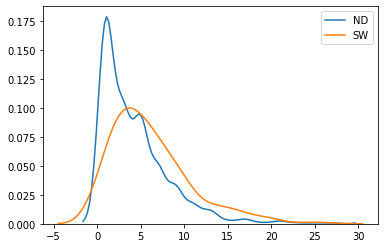

In [300]:
## Ok, in the Brief I talked about rally length by server. This is probably one of the
## first visualisations that should be shown when looking into Rally Statistics

# I think a KDEplot might be the best bet here (or a histogram)

# For Player One as Server:
    # In this case, it is Djok (I Believe)

    
    
# So starting point:

## Get the initials of the players, so that the code is reuseable on other datasets:
sn1 = ds["Serving"].unique()

### Create DataFrame with Player 1 Serving:
zzzz = ds[(ds["Serving"]==(sn1[0]))]
zzz1 = zzzz[(zzzz['isSvrWinner']==1)] # 1 represents that the server (in this case player 1) was the winner (on their own serve)
zzz2 = zzzz[(zzzz['isSvrWinner']==0)] # 0 represents that the returner (player 2) wins the point (on player 1's serve)

# Now Print Details for P1's serve
print("Points won @ Rally Length when ", sn1[0], " Serving") # This is why the Player's Initials Step was used above
sns.kdeplot(zzz1['rallyCount'], label= sn1[0]) 
sns.kdeplot(zzz2['rallyCount'], label= sn1[1])



Points won @ Rally Length when  SW  Serving


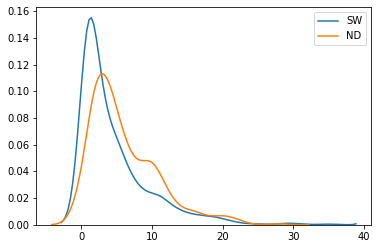

In [301]:
#### Create DataFrame with Player 2 Serving:
# We can just recreate the above for player 2:
xxxx = ds[(ds["Serving"]==(sn1[1]))]
xxx1 = xxxx[(xxxx['isSvrWinner']==1)] # 1 represents that the server (in this case player 1) was the winner (on their own serve)
xxx2 = xxxx[(xxxx['isSvrWinner']==0)] # 0 represents that the returner (player 2) wins the point (on player 1's server)

# Now Print Details for P2's serve
print("Points won @ Rally Length when ", sn1[1], " Serving")
sns.kdeplot(xxx1['rallyCount'], label= sn1[1])
sns.kdeplot(xxx2['rallyCount'], label= sn1[0])
